>Jacob Lustig-Yaeger  

>January 20+, 2016  

# Stratification of the solar atmosphere  

In this exercise we study the radial stratification of the solar atmosphere on the basis of the standard model FALC by Fontenla et al. (1993). They derived this description of the solar photosphere and chromosphere empirically, assuming that the solar atmosphere is horizontally homogeneous ("plane parallel layers") and in hydrostatic equilibrium ("time independent").

We will use that FLAC data file: `falc.dat`.

In [6]:
! head falc.dat

FALC solar model atmosphere of Fontenla, Avrett & Loeser 1993ApJ...406..319F; 82 heights top-to-bottom
 height   tau_500    colmass    temp    v_turb n_Htotal   n_proton   n_electron pressure  p_gas/p  density
 [km]     dimless    [g/cm^2]   [K]     [km/s] [cm^-3]    [cm^-3]    [cm^-3]    [dyn/cm2] ratio    [g/cm^3]
 
 2218.20  0.000E+00  6.777E-06  100000  11.73  5.575E+09  5.575E+09  6.665E+09  1.857E-01  0.952  1.306E-14
 2216.50  7.696E-10  6.779E-06   95600  11.65  5.838E+09  5.837E+09  6.947E+09  1.857E-01  0.950  1.368E-14
 2214.89  1.531E-09  6.781E-06   90816  11.56  6.151E+09  6.150E+09  7.284E+09  1.858E-01  0.948  1.441E-14
 2212.77  2.597E-09  6.785E-06   83891  11.42  6.668E+09  6.667E+09  7.834E+09  1.859E-01  0.945  1.562E-14
 2210.64  3.754E-09  6.788E-06   75934  11.25  7.381E+09  7.378E+09  8.576E+09  1.860E-01  0.941  1.729E-14
 2209.57  4.384E-09  6.790E-06   71336  11.14  7.864E+09  7.858E+09  9.076E+09  1.860E-01  0.938  1.843E-14


In [9]:
import numpy as np
falc = np.genfromtxt('falc.dat', skip_header=4)
height = falc[:,0]
tau500 = falc[:,1]
colm = falc[:,2]
temp = falc[:,3]
vturb = falc[:,4]
nhyd = falc[:,5]
nprot = falc[:,6]
nel = falc[:,7]
ptot = falc[:,8]
pgasptot = falc[:,9]
dens = falc[:,10]

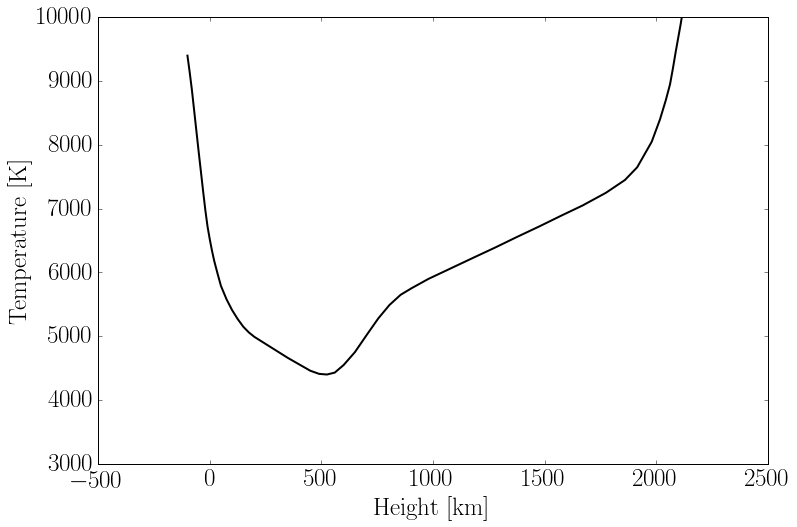

In [21]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,temp, lw=2.0, c='k')      
ax0.legend()
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Temperature [K]")
ax0.set_ylim([3000,10000])
plt.show()

In [54]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np
import scipy as sp
import pdb
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)
mH = 1.67352e-24      # Mass of H (g)
mHe = 3.97 * mH       # Mass of He (g)
Rsun = 6.96e10        # Solar Radius (cm)
Msun = 1.989e33       # Solar Mass (g)

# Define function for color plots
def scalarmap(v,cmap='plasma'):
    import matplotlib.cm as cmx
    import matplotlib.colors as colors
    cm = plt.get_cmap(cmap)
    cNorm  = colors.Normalize(vmin=np.min(v), vmax=np.max(v))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    colors = scalarMap.to_rgba(v)
    return colors,scalarMap,cNorm

# 1.2 FALC density stratification

**Plot the total pressure $p_{tot}$ against the column mass $m$, both linearly and logarithmically. You will find that they scale linearly. Explain what assumption has caused $p_{tot} = c m$ and determine the value of the solar surface gravity $g_{surf} = c$ that went into the FALC-producing code.**

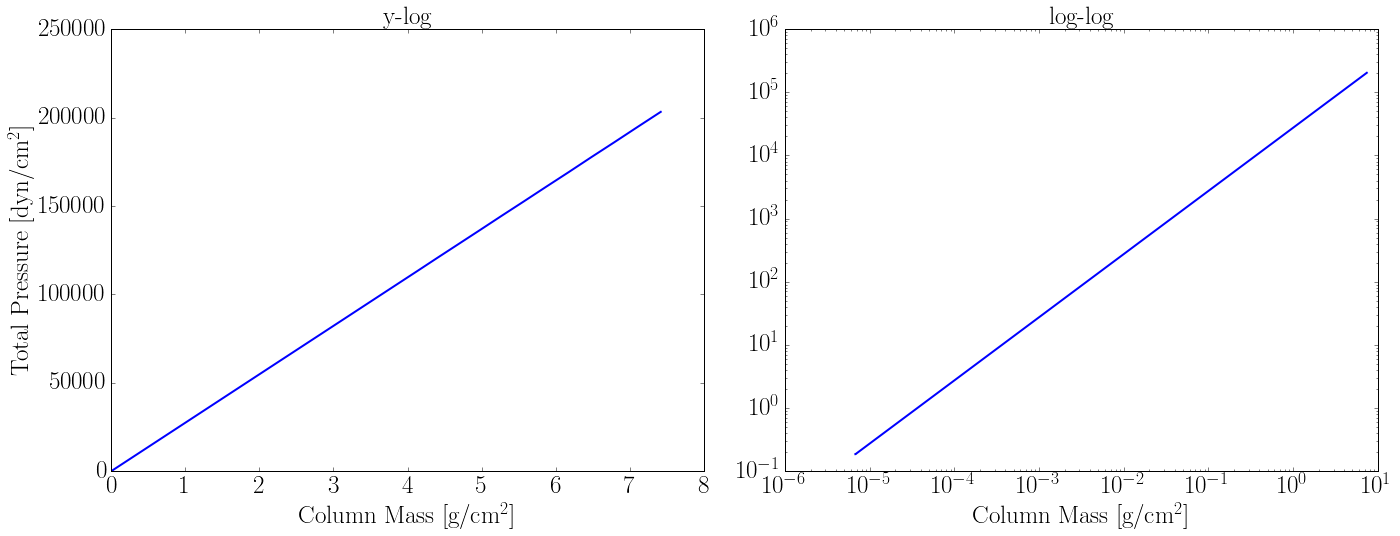

In [20]:
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,2) 
ax0 = plt.subplot(gs[0])
ax0.plot(colm,ptot, lw=2.0)      
ax0.set_xlabel(r"Column Mass [g/cm$^2$]")
ax0.set_ylabel(r"Total Pressure [dyn/cm$^2$]")
#ax0.set_xlim([1000,21000])
ax0.set_title('y-log')

ax1 = plt.subplot(gs[1])
ax1.plot(colm,ptot,lw=2.0)      
ax1.set_xlabel(r"Column Mass [g/cm$^2$]")
ax1.loglog()
ax1.set_title('log-log')
#ax1.set_xlim([1000,21000])

fig.tight_layout()
plt.show()

**Fontenla et al. (1993) also assumed complete mixing, i.e., the same element mix at all heights. Check this by plotting the ratio of the hydrogen mass density to the total mass density against height (the hydrogen atom mass is $m_{H} = 1.67352 \times 10^{-24}$ g, e.g., Allen 1976). Then add helium to hydrogen using their abundance and mass ratios ($N_{He} /N_H = 0.1, m_{He} = 3.97 m_{H}$), and estimate the fraction of the total mass density made up by the remaining elements in the model mix (the "metals").**

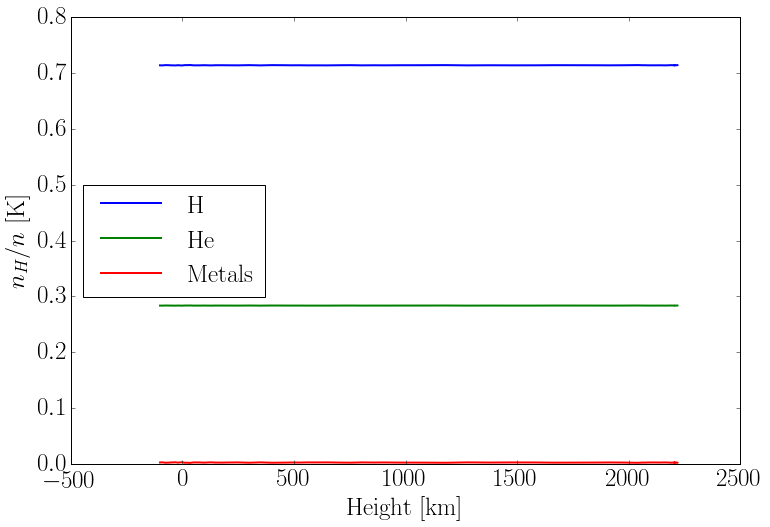

In [35]:
fH = nhyd*mH/dens
fHe = 0.1*nhyd*mHe/dens 
fZ = 1.0 - fH -fHe

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,fH, lw=2.0, label="H")
ax0.plot(height,fHe, lw=2.0, label="He")
ax0.plot(height,fZ, lw=2.0, label="Metals")
ax0.legend(loc=6)
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"$n_{H}/n$ [K]")
#ax0.semilogy()
plt.show()

In [39]:
print "Fraction of total mass density made up by metals:", np.mean(fZ)

Fraction of total mass density made up by metals: 0.00222580708084


**Plot the column mass against height.**

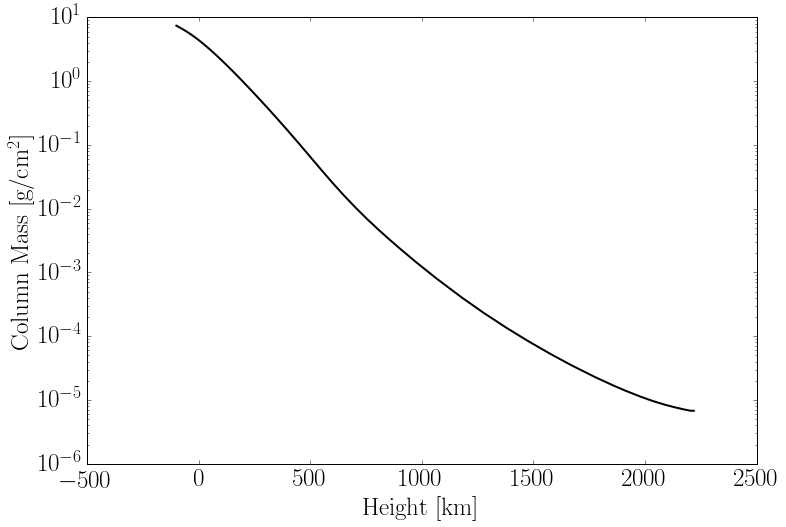

In [41]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,colm, lw=2.0, c='k')
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Column Mass [g/cm$^2$]")
ax0.semilogy()
plt.show()

**The curve becomes nearly straight when you make the y-axis logarithmic. Why is that? Why isn’t it exactly straight?**  

>Ans  

**Plot the gas density against height. Estimate the density scale height $H_{\rho}$ in $\rho \approx \rho(0) \exp(^{-h}/_{H\rho})$ in the photosphere.**

In [47]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

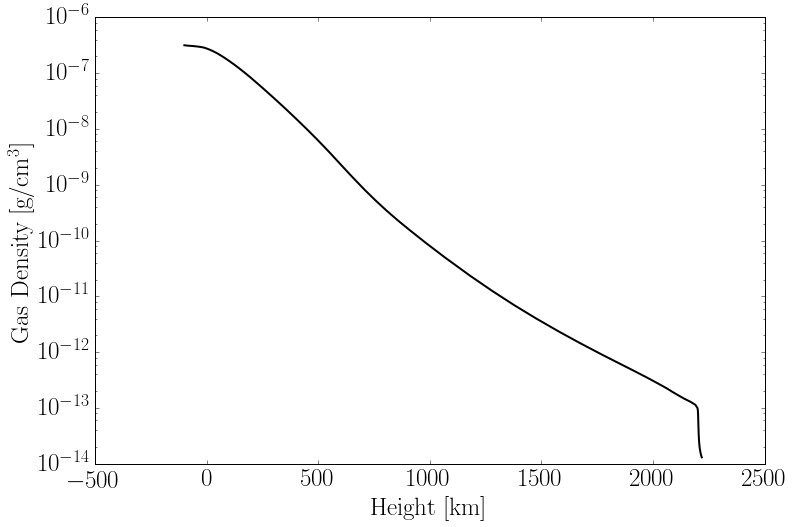

In [57]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,dens, lw=2.0, c='k')
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Gas Density [g/cm$^3$]")
ax0.semilogy()
plt.show()

In [59]:
# Photosphere h = 525 km
iphot = find_nearest(height,525)

# Scale Height 
Hrho = -height[iphot] / np.log(dens[iphot]/dens[0])

print "Pressure Scale Height in the solar photosphere: ", Hrho

Pressure Scale Height in the solar photosphere:  -40.9234034348
